In [1]:
# All imports are here
%matplotlib inline
import numpy as np
import scipy.stats as sts
from typing import Dict, Tuple
import matplotlib.pyplot as plt


In [2]:
def pearson_coeff(x: np.array, y: np.array) -> float:
    """
    This function calculates the pearson coefficient for a sample dataset
    :param x: numpy array of x values
    :param y: numpy array of y values
    :return: pearson coefficient
    """
    covar = np.sum((x - np.mean(x)) * (y - np.mean(y)))
    varx = np.sum((x - np.mean(x)) ** 2)
    vary = np.sum((y - np.mean(y)) ** 2)
    return covar / np.sqrt(varx * vary)


In [3]:
def linear_regression_least_squared(x: np.array, y:np.array) -> Dict[str, float]:
  """
  This function calculates the linear regression of the given data
  :param x: 1D numpy array of data
  :param y: 1D numpy array of data
  :return: dictionary of the linear regression parameters
  """
  # least squared estimate of the slope
  slope = np.sum((x - np.mean(x))*y) / np.sum((x - np.mean(x)) ** 2)

  # least squared estimate of intercept
  intercept = np.mean(y) - slope * np.mean(x)

  # predicted data
  predicted = intercept + np.multiply(x, slope)

  degrees_of_freedom = len(y) - 2

  # mean squared error of residuals
  residual = (y - predicted)
  sum_squared_residuals = np.sum(residual ** 2)
  mean_squared_error = np.sum(residual ** 2) / degrees_of_freedom

  # variance of slope
  variance_slope = mean_squared_error / np.sum((x - np.mean(x)) ** 2)

  # null hypothesis: slope = 0
  t_statistic = slope / np.sqrt(variance_slope)

  # p-value
  p_value = 2 * (sts.t.cdf(-1*np.abs(t_statistic), df=degrees_of_freedom))

  return {
    "slope": slope,
    "intercept": intercept,
    "residual": residual,
    "sum_squared_residuals": sum_squared_residuals,
    "mean_squared_error": mean_squared_error,
    "variance_slope": variance_slope,
    "degrees_of_freedom": degrees_of_freedom,
    "t_statistic": t_statistic,
    "p_value": p_value
    }


### Question 2

In [4]:
def lack_of_fit_test(x: np.array, y:np.array) -> Dict[str, float]:
    """
    This function performs the lack of fit test using linear regression
    :param x: 1D numpy array of data
    :param y: 1D numpy array of data
    :return: dictionary of lack of fit test parameters
    """
    # fit the data to a linear regression
    regression = linear_regression_least_squared(x, y)
    sum_squared_residuals = regression["sum_squared_residuals"]

    # group nearest x values and compute pure error in y
    z = list(zip(x, y))
    z.sort(key=lambda x: x[0])
    pure_error = 0
    number_of_groups = 0
    group_length = 2
    for i in range(0, len(z), group_length):
        group = z[i:i+group_length]

        number_of_groups += 1
        mean_y = np.mean(group, axis=0)[1]
        # print(group, mean_y)
        for g in group:
            pure_error += (g[1] - mean_y) ** 2

    # lack of fit test
    n = len(x)
    numerator = (sum_squared_residuals - pure_error) / (number_of_groups - 2)
    denominator = pure_error / (n - number_of_groups)
    f_statistic = numerator / denominator

    # calculate p value using f distribution
    alpha = 0.05
    f_critical = sts.f.ppf(1 - alpha, number_of_groups - 2, n - number_of_groups)
    p_value = 1 - sts.f.cdf(f_statistic, number_of_groups - 2, n - number_of_groups)

    return {
        "f_statistic": f_statistic,
        "f_critical": f_critical,
        "p_value": p_value
    }


#### 2.a

In [5]:
# Anscombe datasets
x1 = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0], dtype=np.float64)
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68], dtype=np.float64)

x2 = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0], dtype=np.float64)
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74], dtype=np.float64)

x3 = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0], dtype=np.float64)
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73], dtype=np.float64)

x4 = np.array([8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0], dtype=np.float64)
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89], dtype=np.float64)

# calculate pearson co-efficient
r1 = pearson_coeff(x1, y1)
r2 = pearson_coeff(x2, y2)
r3 = pearson_coeff(x3, y3)
r4 = pearson_coeff(x4, y4)
print("Pearson co-efficient for dataset 1: ", r1)
print("Pearson co-efficient for dataset 2: ", r2)
print("Pearson co-efficient for dataset 3: ", r3)
print("Pearson co-efficient for dataset 4: ", r4)

# calculate co-efficient of multiple determination
print("Coefficient of multiple determination for dataset 1: ", r1 ** 2)
print("Coefficient of multiple determination for dataset 2: ", r2 ** 2)
print("Coefficient of multiple determination for dataset 3: ", r3 ** 2)
print("Coefficient of multiple determination for dataset 4: ", r4 ** 2)

# calculate residuals
residual1 = linear_regression_least_squared(x1, y1)["residual"]
residual2 = linear_regression_least_squared(x2, y2)["residual"]
residual3 = linear_regression_least_squared(x3, y3)["residual"]
residual4 = linear_regression_least_squared(x4, y4)["residual"]


Pearson co-efficient for dataset 1:  0.81642051634484
Pearson co-efficient for dataset 2:  0.8162365060002427
Pearson co-efficient for dataset 3:  0.8162867394895981
Pearson co-efficient for dataset 4:  0.816521436888503
Coefficient of multiple determination for dataset 1:  0.6665424595087752
Coefficient of multiple determination for dataset 2:  0.6662420337274841
Coefficient of multiple determination for dataset 3:  0.666324041066559
Coefficient of multiple determination for dataset 4:  0.6667072568984656


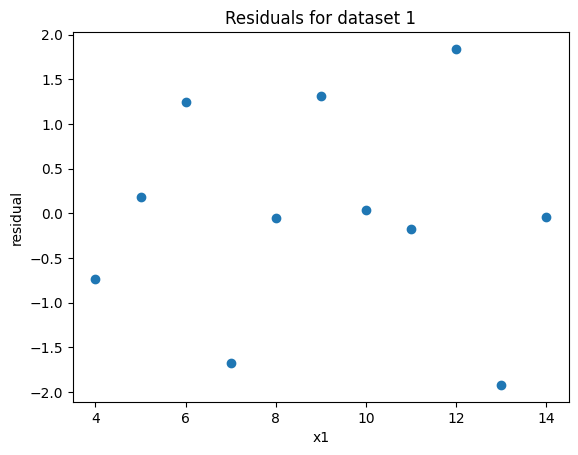

In [6]:
plt.scatter(x1, residual1)
plt.xlabel("x1")
plt.ylabel("residual")
plt.title("Residuals for dataset 1")
plt.show()


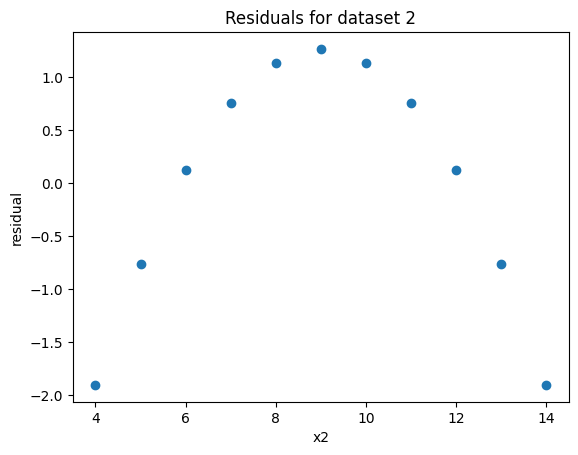

In [7]:
# plot residuals of dataset 2
plt.scatter(x2, residual2)
plt.xlabel("x2")
plt.ylabel("residual")
plt.title("Residuals for dataset 2")
plt.show()


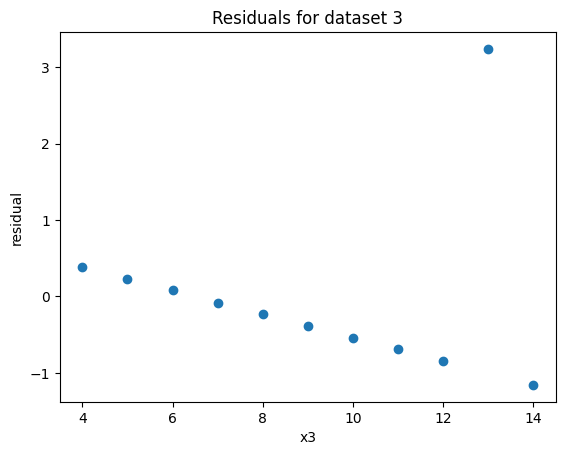

In [8]:
# plot residuals of dataset 3
plt.scatter(x3, residual3)
plt.xlabel("x3")
plt.ylabel("residual")
plt.title("Residuals for dataset 3")
plt.show()


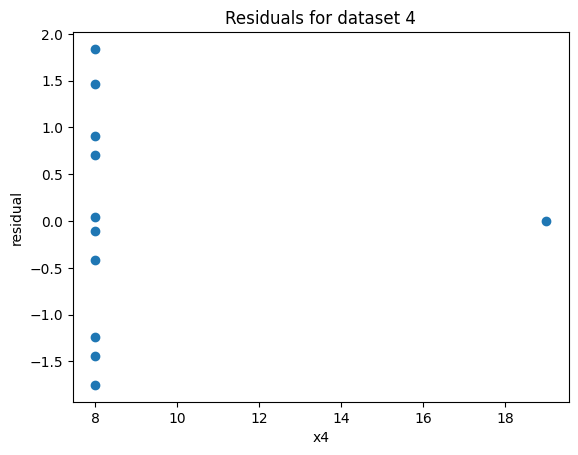

In [9]:
# plot residuals of dataset 4
plt.scatter(x4, residual4)
plt.xlabel("x4")
plt.ylabel("residual")
plt.title("Residuals for dataset 4")
plt.show()


#### 2.b

In [10]:
# perform lack of fit test
f_test = lack_of_fit_test(x1, y1)
print("Lack of fit test for dataset 1")
print("F statistic < F critical: ", f_test["f_statistic"], ' < ', f_test["f_critical"])
print("H0 is true with p value: ", f_test["p_value"])
print("")

f_test = lack_of_fit_test(x2, y2)
print("Lack of fit test for dataset 2")
print("F statistic > F critical: ", f_test["f_statistic"], ' > ', f_test["f_critical"])
print("Reject H0 with p value: ", f_test["p_value"])
print("Ha is true")
print("")

f_test = lack_of_fit_test(x3, y3)
print("Lack of fit test for dataset 3")
print("F statistic < F critical: ", f_test["f_statistic"], ' < ', f_test["f_critical"])
print("H0 is true with p value: ", f_test["p_value"])
print("")


f_test = lack_of_fit_test(x4, y4)
print("Lack of fit test for dataset 4")
print("F statistic > F critical: ", f_test["f_statistic"], ' > ', f_test["f_critical"])
print("Reject H0 with p value: ", f_test["p_value"])
print("Ha is true")
print("")


Lack of fit test for dataset 1
F statistic < F critical:  0.310813324200126  <  5.192167772803923
H0 is true with p value:  0.8597311779823037

Lack of fit test for dataset 2
F statistic > F critical:  6.352977388623873  >  5.192167772803923
Reject H0 with p value:  0.03385559365971624
Ha is true

Lack of fit test for dataset 3
F statistic < F critical:  0.346779534458874  <  5.192167772803923
H0 is true with p value:  0.8365858314741742

Lack of fit test for dataset 4
F statistic > F critical:  5.446206170697954  >  5.192167772803923
Reject H0 with p value:  0.045668937642535434
Ha is true



### Question 3

In [11]:
# fit a linear regression model for the first dataset
regression = linear_regression_least_squared(x1, y1)

given_x = np.array([4, 6, 8, 10, 12, 14])
estimated_y = regression["intercept"] + regression["slope"] * given_x

# calculate standard error for the estimated y
standard_error = np.sqrt(
    regression["mean_squared_error"] *
    (1/len(x1) + (given_x - np.mean(x1)) ** 2 / np.sum((x1 - np.mean(x1)) ** 2)))


#### 3.a

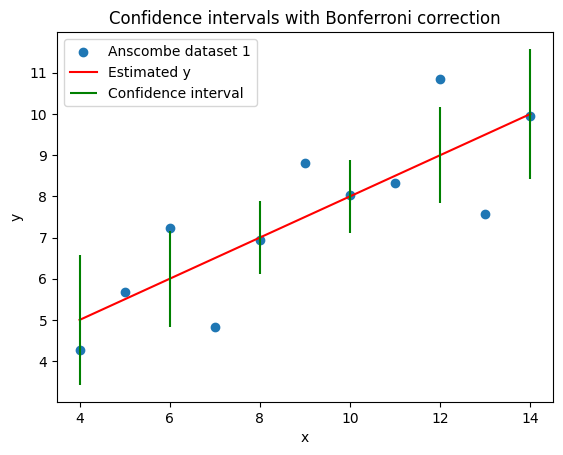

In [24]:
# Bonferroni correction
# calculate confidence interval
alpha = 0.05
number_of_tests = 2
t_critical = sts.t.ppf(1 - alpha / number_of_tests, regression["degrees_of_freedom"])
confidence_interval = t_critical * standard_error

# lower and upper bounds of the confidence interval
lower_bound = estimated_y - confidence_interval
upper_bound = estimated_y + confidence_interval

# plot the data
plt.scatter(x1, y1, label="Anscombe dataset 1")
plt.plot(given_x, estimated_y, color='red', label="Estimated y")
# plt.plot(given_x, lower_bound, color='green', label="CI Lower bound")
# plt.plot(given_x, upper_bound, color='green', label="CI Upper bound")
# plt.fill_between(given_x, lower_bound, upper_bound,  color='gray', alpha=0.3, label="Confidence interval")
plt.vlines(given_x, lower_bound, upper_bound, color='green', label="Confidence interval")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Confidence intervals with Bonferroni correction")
plt.legend()
plt.show()


#### 3.b

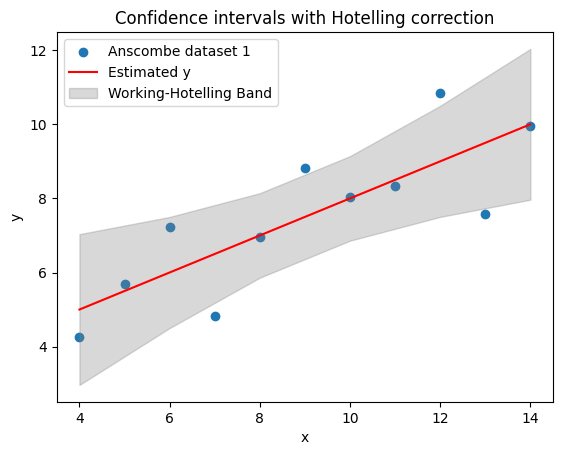

In [13]:
# working hotelling confidence interval
# calculate confidence interval
alpha = 0.05
w_squared = 2 * sts.f.ppf(1 - alpha, 2, regression["degrees_of_freedom"])
w = np.sqrt(w_squared)
confidence_interval = w * standard_error

# lower and upper bounds of confidence interval
lower_bound = estimated_y - confidence_interval
upper_bound = estimated_y + confidence_interval

# plot the data
plt.scatter(x1, y1, label="Anscombe dataset 1")
plt.plot(given_x, estimated_y, color='red', label="Estimated y")
# plt.plot(given_x, lower_bound, color='green', label="CI Lower bound")
# plt.plot(given_x, upper_bound, color='green', label="CI Upper bound")
plt.fill_between(given_x, lower_bound, upper_bound, color='gray', alpha=0.3, label='Working-Hotelling Band')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Confidence intervals with Hotelling correction")
plt.legend()
plt.show()


### Question 4

#### 4.a

In [14]:
triceps = np.array(
    [19.5, 24.7, 30.7, 29.8, 19.1, 25.6, 31.4, 27.9, 22.1, 25.5, 31.1, 30.4, 18.7, 19.7, 14.6, 29.5, 27.7, 30.2, 22.7, 25.2],
    dtype=np.float64)
thigh = np.array(
    [43.1, 49.8, 51.9, 54.3, 42.2, 53.9, 58.5, 52.1, 49.9, 53.5, 56.6, 56.7, 46.5, 44.2, 42.7, 54.4, 55.3, 58.6, 48.2, 51.0],
    dtype=np.float64)
midarm = np.array(
    [29.1, 28.2, 37.0, 31.1, 30.9, 23.7, 27.6, 30.6, 23.2, 24.8, 30.0, 28.3, 23.0, 28.6, 21.3, 30.1, 25.7, 24.6, 27.1, 27.5],
    dtype=np.float64)
body_fat = np.array(
    [11.9, 22.8, 18.7, 20.1, 12.9, 21.7, 27.1, 25.4, 21.3, 19.3, 25.4, 27.2, 11.7, 17.8, 12.8, 23.9, 22.6, 25.4, 14.8, 21.1],
    dtype=np.float64)

matrix = np.vstack((triceps, thigh, midarm, body_fat))
covariance = np.cov(matrix)
# round numbers to 2 decimal places
covariance = np.round(covariance, 2)
print(covariance)


[[25.23 24.29  8.39 21.63]
 [24.29 27.4   1.62 23.47]
 [ 8.39  1.62 13.3   2.65]
 [21.63 23.47  2.65 26.07]]


#### 4.b

In [15]:
def plot_scatter_with_regression(x: np.array,
                                 y:np.array,
                                 xlabel: str,
                                 ylabel: str) -> Dict[str, float]:
    """
    This function plots a scatter plot with a linear regression line
    :param x: 1D numpy array of data
    :param y: 1D numpy array of data
    :param xlabel: label for x axis
    :param ylabel: label for y axis
    :return: dictionary of linear regression parameters
    """
    # slope, intercept = np.polyfit(x, y, 1)
    regression = linear_regression_least_squared(x, y)
    slope = regression["slope"]
    intercept = regression["intercept"]
    predicted = slope * x + intercept

    # scatter plot of the data
    plt.scatter(x, y)
    # overlay regression line
    plt.plot(x, predicted, color='red')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f'{ylabel} vs {xlabel}')
    return regression


Summary of the regression for Triceps and Body fat
Slope:  0.8571865102168307
Intercept:  -1.4961046410369008
Mean squared error:  7.9510946204464545
R square:  0.7110966155559691


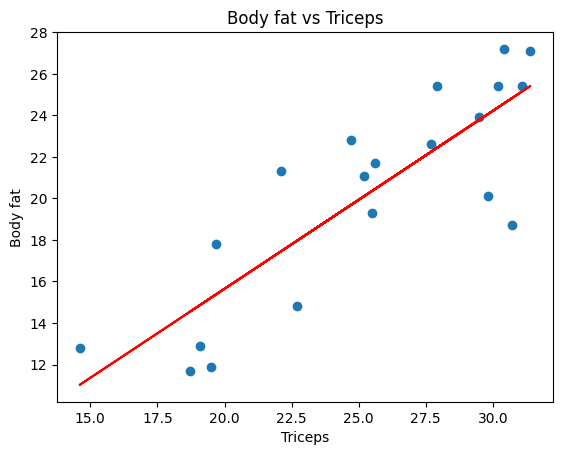

In [16]:
# plot for triceps and body fat
summary = plot_scatter_with_regression(triceps, body_fat, "Triceps", "Body fat")

# summary of the regression
print("Summary of the regression for Triceps and Body fat")
print("Slope: ", summary["slope"])
print("Intercept: ", summary["intercept"])
print("Mean squared error: ", summary["mean_squared_error"])
rsquare = pearson_coeff(triceps, body_fat) ** 2
print("R square: ", rsquare)


Summary of the regression for Thigh and Body fat
Slope:  0.8565465923453093
Intercept:  -23.634489130309476
Mean squared error:  6.301315680517195
R square:  0.7710414083275696


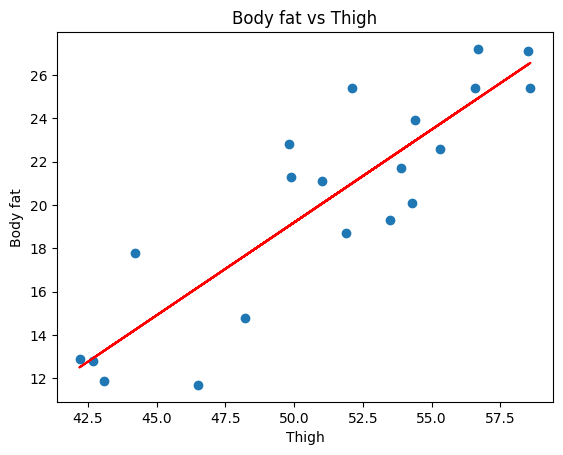

In [17]:
# plot for thigh and body fat
summary = plot_scatter_with_regression(thigh, body_fat, "Thigh", "Body fat")

# summary of the regression
print("Summary of the regression for Thigh and Body fat")
print("Slope: ", summary["slope"])
print("Intercept: ", summary["intercept"])
print("Mean squared error: ", summary["mean_squared_error"])
rsquare = pearson_coeff(thigh, body_fat) ** 2
print("R square: ", rsquare)


Summary of the regression for Midarm and Body fat
Slope:  0.19942864378076847
Intercept:  14.686780858775176
Mean squared error:  26.963216527564555
R square:  0.020290301881323802


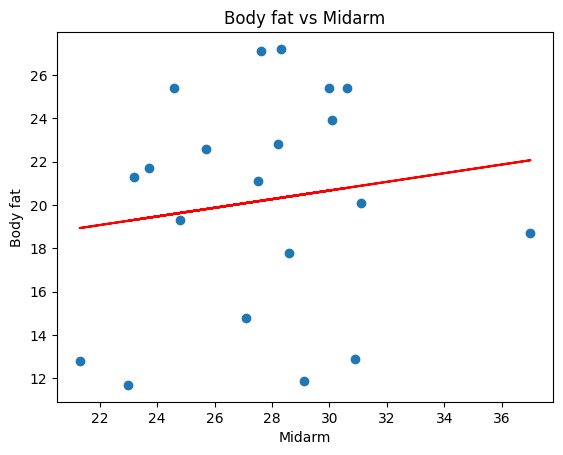

In [22]:
# plot for midarm and body fat
summary = plot_scatter_with_regression(midarm, body_fat, "Midarm", "Body fat")

# summary of the regression
print("Summary of the regression for Midarm and Body fat")
print("Slope: ", summary["slope"])
print("Intercept: ", summary["intercept"])
print("Mean squared error: ", summary["mean_squared_error"])
rsquare = pearson_coeff(midarm, body_fat) ** 2
print("R square: ", rsquare)


#### 4.c

In [19]:
# multivariate regression with tricep and tricep squared
x = np.vstack((np.ones_like(triceps), triceps, triceps ** 2)).T
coefficients, residuals, rank, singular_values = np.linalg.lstsq(x, body_fat, rcond=None)
predicted = np.dot(x, coefficients)

# calculate mse
b0, b1, b2 = coefficients
predictors = 2
df = len(triceps) - predictors - 1
mse = residuals / df

# calculate R squared
total_variance = np.sum((body_fat - np.mean(body_fat)) ** 2)
explained_variance = np.sum((predicted - np.mean(body_fat)) ** 2)
rsquared = explained_variance / total_variance

# summary of the regression
print("Summary of multivariate regression for Tricep, Triceps squared and Body fat")
print("Intercept: ", b0)
print("Coefficient for Triceps: ", b1)
print("Coefficient for Triceps squared: ", b2)
print("Mean squared error: ", mse)
print("R squared: ", rsquared)


Summary of multivariate regression for Tricep, Triceps squared and Body fat
Intercept:  -6.152367677049151
Coefficient for Triceps:  1.2612328513646762
Coefficient for Triceps squared:  -0.008381767410968965
Mean squared error:  [8.37778301]
R squared:  0.7125043807033611


#### 4.d

In [20]:
# multivariate regression with tricep and thigh
x = np.vstack((np.ones_like(triceps), triceps, thigh)).T
coefficients, residuals, rank, singular_values = np.linalg.lstsq(x, body_fat, rcond=None)
predicted = np.dot(x, coefficients)

# calculate mse
b0, b1, b2 = coefficients
predictors = 2
df = len(triceps) - predictors - 1
mse = residuals / df

# calculate R squared
total_variance = np.sum((body_fat - np.mean(body_fat)) ** 2)
explained_variance = np.sum((predicted - np.mean(body_fat)) ** 2)
rsquared = explained_variance / total_variance

# summary of the regression
print("Summary of multivariate regression for Tricep, Thigh and Body fat")
print("Intercept: ", b0)
print("Coefficient for Triceps: ", b1)
print("Coefficient for Thigh: ", b2)
print("Mean squared error: ", mse)
print("R squared: ", rsquared)


Summary of multivariate regression for Tricep, Thigh and Body fat
Intercept:  -19.174245642784616
Coefficient for Triceps:  0.22235259110975114
Coefficient for Thigh:  0.6594217964579312
Mean squared error:  [6.46769355]
R squared:  0.7780518353049858


#### 4.e

In [21]:
# multivariate regression with tricep and thigh and midarm
x = np.vstack((np.ones_like(triceps), triceps, thigh, midarm)).T
coefficients, residuals, rank, singular_values = np.linalg.lstsq(x, body_fat, rcond=None)
predicted = np.dot(x, coefficients)

# calculate mse
b0, b1, b2, b3 = coefficients
predictors = 3
df = len(triceps) - predictors - 1
mse = residuals / df

# calculate R squared
total_variance = np.sum((body_fat - np.mean(body_fat)) ** 2)
explained_variance = np.sum((predicted - np.mean(body_fat)) ** 2)
rsquared = explained_variance / total_variance

# summary of the regression
print("Summary of multivariate regression for Tricep, Thigh, Midarm and Body fat")
print("Intercept: ", b0)
print("Coefficient for Triceps: ", b1)
print("Coefficient for Thigh: ", b2)
print("Coefficient for Midarm: ", b3)
print("Mean squared error: ", mse)
print("R squared: ", rsquared)


Summary of multivariate regression for Tricep, Thigh, Midarm and Body fat
Intercept:  117.0846947751206
Coefficient for Triceps:  4.334092008221031
Coefficient for Thigh:  -2.856847936166413
Coefficient for Midarm:  -2.186060251611825
Mean squared error:  [6.15030551]
R squared:  0.8013585508627912
